<a href="https://colab.research.google.com/github/PaulToronto/University-of-Colorado-Boulder---Essential-Math-Specialization/blob/main/2_3_Properties_of_a_Linear_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Properties of a Linear System

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

## 2.3.1 Vectors and Linear Combinations

### 2.3.1.1 Introduction to Vectors + Coordinates

- In this course, when we talk about **vectors**, we are specifically talking about **column vectors**, but **row vectors** do exist
- A column vector is a matrix with one column
- The rules for matrix addition, scalar multiplication and multiplication apply

$$
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} +
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} =
\begin{bmatrix}
x_1 + y_1 \\
x_2 + y_2 \\
\vdots \\
x_n + y_n
\end{bmatrix}
$$

#### Visualizing Vectors

$$
\mathbf{a} = \begin{bmatrix}-2 \\ 1\end{bmatrix},
\mathbf{b} = \begin{bmatrix}4 \\ 3\end{bmatrix}
$$

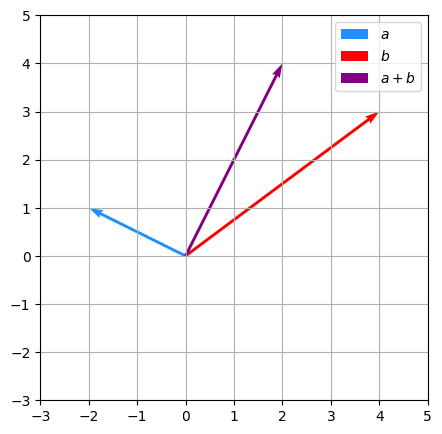

In [2]:
a = np.array([-2, 1])
b = np.array([4, 3])
tail = np.array([0, 0])


plt.figure(figsize=(5, 5))

plt.quiver(*tail, a[0], a[1], scale=1,
           scale_units='xy', angles='xy',
           color='dodgerblue', label=r'$a$')
plt.quiver(*tail, b[0], b[1], scale=1,
           scale_units='xy', angles='xy',
           color='red', label='$b$')
plt.quiver(*tail, (a + b)[0], (a + b)[1], scale=1,
           scale_units='xy', angles='xy',
           color='purple', label='$a + b$')

plt.grid()
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-3, 6))
plt.legend()

plt.show()

#### Parallelogram Rule

If we place two vectors so they have the same initial point, and then complete the vectors into a parallelogram, then the sum of the vectors is the directed diagonal that starts at the same point as the vectors.

### 2.3.1.2 Introduction to Linear Combinations

Let {$v_1$, $v_2$, $\cdots$, $v_n$} be set of column vectors of the same dimension (same number of rows)

$$
y = c_1v_1 + c_2v_2 + \cdots + c_nv_n
$$

$y$ is a **linear combination** of the given set of vectors.

In [3]:
v1 = sym.Matrix([0, 1])
v1

Matrix([
[0],
[1]])

In [4]:
v2 = sym.Matrix([-1, 3])
v2

Matrix([
[-1],
[ 3]])

In [5]:
# here, y is a linear combination of v1 and v2
y = sym.sqrt(3) * v1 + 14 * v2
y

Matrix([
[         -14],
[sqrt(3) + 42]])

### 2.3.1.3 Linear Combinations

$
a_1 = \begin{bmatrix}1 \\ -2 \\ -5\end{bmatrix},
a_2 = \begin{bmatrix}2 \\ 5 \\ 6\end{bmatrix}
$

<br>

$
b = \begin{bmatrix}7 \\ 4 \\ -3\end{bmatrix}
$

<br>

Are there scalars $c_1$ and $c_2$ such that $b = c_1a_1 + c_2a_2$? In other words, is $b$ a linear combination of $a_1$ and $a_2$?

### 2.3.1.4 Linear Combinations Example (continued from previous section)

In [6]:
a1 = sym.Matrix([1, -2, -5])
a2 = sym.Matrix([2, 5, 6])
b = sym.Matrix([7, 4, -3])

$
\begin{align}
&b = c_1a_1 + c_2a_2 \\
&\implies\begin{bmatrix}7 \\ 4 \\ -3\end{bmatrix} = c_1\begin{bmatrix}1 \\ -2 \\ -5\end{bmatrix}
+ c_2\begin{bmatrix}2 \\ 5 \\ 6\end{bmatrix} \\
&\implies\begin{bmatrix}7 \\ 4 \\ -3\end{bmatrix} =
\begin{bmatrix}c_1 + 2c_2\\-2c_1 + 5c_2\\-5c_1 + 6c_2\end{bmatrix}
\end{align}
$

Now we have system of linear equations, which can be represented as an augmented matrix

In [7]:
A = sym.Matrix([[1, 2, 7],
                [-2, 5, 4],
                [-5, 6, -3]])
A

Matrix([
[ 1, 2,  7],
[-2, 5,  4],
[-5, 6, -3]])

$R_2 \leftarrow R_2 + 2R_1$

$R_3 \leftarrow R_3 + 5R_1$

In [8]:
A[1,:] = A.row(1) + 2 * A.row(0)
A[2,:] = A.row(2) + 5 * A.row(0)
A

Matrix([
[1,  2,  7],
[0,  9, 18],
[0, 16, 32]])

$R_2 \leftarrow \frac{1}{9}R_2$

$R_3 \leftarrow \frac{1}{16}R_3$

In [9]:
A[1,:] = sym.Rational(1, 9) * A.row(1)
A[2,:] = sym.Rational(1, 16) * A.row(2)
A

Matrix([
[1, 2, 7],
[0, 1, 2],
[0, 1, 2]])

$R_3 \leftarrow R_3 - R_2$

In [10]:
A[2,:] = A.row(2) - A.row(1)
A

Matrix([
[1, 2, 7],
[0, 1, 2],
[0, 0, 0]])

$R_1 \leftarrow = R_1 - 2R_2$

In [11]:
A[0,:] = A.row(0) - 2 * A.row(1)
A

Matrix([
[1, 0, 3],
[0, 1, 2],
[0, 0, 0]])

In [12]:
c1 = 3
c2 = 2
c1, c2

(3, 2)

In [13]:
c1 * a1 + c2 * a2

Matrix([
[ 7],
[ 4],
[-3]])

In [14]:
b

Matrix([
[ 7],
[ 4],
[-3]])

In [15]:
c1 * a1 + c2 * a2 == b

True

#### Alternate method

In [16]:
A = sym.Matrix([[1, 2, 7],
                [-2, 5, 4],
                [-5, 6, -3]])
A.rref(pivots=False)

Matrix([
[1, 0, 3],
[0, 1, 2],
[0, 0, 0]])

In [17]:
c1 = 3
c2 = 2
c1 * a1 + c2 * a2 == b

True

#### Alternate method

In [18]:
a1, a2, b

(Matrix([
 [ 1],
 [-2],
 [-5]]),
 Matrix([
 [2],
 [5],
 [6]]),
 Matrix([
 [ 7],
 [ 4],
 [-3]]))

In [19]:
c1, c2 = sym.symbols('c_1 c_2')

In [20]:
sym.solve(c1 * a1 + c2 * a2 - b)

{c_1: 3, c_2: 2}

In [21]:
sym.solve(sym.Eq(c1 * a1 + c2 * a2, b))

{c_1: 3, c_2: 2}

## 2.3.2 Linear Independence

### 2.3.2.1 Span

Suppose $S$ is a set of vectors.

$$
S = \{v_1, v_2, \cdots, v_n\}
$$

The **span** of set $S$, denoted $\text{span}(S)$ is the set of all linear combinations of the vectors in $S$.

#### Example

$$
S = \{v_1, v_2\}
$$

where:

$$
v_1 = \begin{bmatrix}1\\0\\0\end{bmatrix},
v_2 = \begin{bmatrix}0\\1\\0\end{bmatrix}
$$

Is $b = \begin{bmatrix}1\\1\\1\end{bmatrix}$ in $\text{span}(S)$?

#### Solution

Let $c_1$ and $c_2$ be scalars. If $b$ is in $\text{span}(S)$, then

$$
\begin{align}
& c_1v_1 + c_2v_2 = \begin{bmatrix}1\\1\\1\end{bmatrix} \\
&\implies
c_1\begin{bmatrix}1\\0\\0\end{bmatrix} + c_2\begin{bmatrix}0\\1\\0\end{bmatrix} = \begin{bmatrix}1\\1\\1\end{bmatrix} \\
&\implies
\begin{bmatrix}c_1\\c_2\\0\end{bmatrix} = \begin{bmatrix}1\\1\\1\end{bmatrix}
\end{align}
$$

There is no solution.

$\therefore b$ is not in $\text{span}(S)$.

### 2.3.2.2 Span Example

$$
a_1 = \begin{bmatrix}1\\-2\\3\end{bmatrix},
a_2 = \begin{bmatrix}5\\-13\\-3\end{bmatrix},
b = \begin{bmatrix}-3\\8\\1\end{bmatrix},
S = \{v_1, v2\}
$$

Is $b$ in $\text{span}(S)$?


#### Solution:

$$
\begin{align}
\text{span}(S) &= c_1a_1 + c_2a_2 \\
&= \begin{bmatrix}c_1 + 5c_2\\-2c_1 - 13_c2\\3c_1 - 3c_2\end{bmatrix}
\end{align}
$$

Can we find a $c_1$ and $c_2$ such that $b$ is in the span? The span of $S$ is a plane in 3-space. Does $b$ lie on that plane?

$$
\begin{align}
\begin{bmatrix}c_1 + 5c_2\\-2c_1 - 13c_2\\3c_1 - 3c_2\end{bmatrix} &= \begin{bmatrix}-3\\8\\1\end{bmatrix}
\end{align}
$$

This can be expressed as an augmented matrix.

In [22]:
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
A

Matrix([
[ 1,   5, -3],
[-2, -13,  8],
[ 3,  -3,  1]])

$R_2 \leftarrow R_2 + 2R_1$

$R_3 \leftarrow R_3 - 3R_1$

In [23]:
A[1,:] = A.row(1) + 2 * A.row(0)
A[2,:] = A.row(2) - 3 * A.row(0)
A

Matrix([
[1,   5, -3],
[0,  -3,  2],
[0, -18, 10]])

$R_3 \leftarrow R_3 + 6R_2$

In [24]:
A[2,:] = A.row(2) - 6 * A.row(1)
A

Matrix([
[1,  5, -3],
[0, -3,  2],
[0,  0, -2]])

There is no solution.

$\therefore b$ is not in $\text{span}(S)$.

#### Alternate Solutions:

In [25]:
# this also shows there are no solutions
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
A.rref(pivots=False)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [26]:
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
a1 = A.col(0)
a2 = A.col(1)
b = A.col(2)

c1, c2 = sym.symbols('c_1 c_2')

# no solutions
sym.solve(c1 * a1 + c2 * a2 - b)

[]

In [27]:
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
a1 = A.col(0)
a2 = A.col(1)
b = A.col(2)

c1, c2 = sym.symbols('c_1 c_2')

# no solutions
sym.solve(sym.Eq(c1 * a1 + c2 * a2, b))

[]

### 2.3.2.3 $A\vec{x} = \vec{b}$

This seems like a very bad example since the determinant of $A$ is $0$.

In [28]:
A = sym.Matrix([[1, 3, 4],
                [-4, 2, -6],
                [-3, -2, -7]])
A.det()

0

Our goal is to be able to solve for $\vec{x}$ given any $\vec{b}$.

$$
A = \begin{bmatrix}
1 & 3 & 4 \\
-4 & 2 & -6 \\
-3 & -2 & -7
\end{bmatrix},
\vec{x} = \begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix},
\vec{b} = \begin{bmatrix}
b_1 \\
b_2 \\
b_3
\end{bmatrix}
$$

Solving for $\vec{x}$ using Gaussian Elimination we let $M$ be the augmented matrix:

In [29]:
b1, b2, b3 = sym.symbols('b_1 b_2 b_3')

M = sym.Matrix([[1, 3, 4, b1],
                [-4, 2, -6, b2],
                [-3, -2, -7, b3]])
M

Matrix([
[ 1,  3,  4, b_1],
[-4,  2, -6, b_2],
[-3, -2, -7, b_3]])

$R_2 \leftarrow R_2 + 4R_1$

$R_3 \leftarrow R_3 + 3R_1$

In [30]:
M[1,:] = M.row(1) + 4 * M.row(0)
M[2,:] = M.row(2) + 3 * M.row(0)
M

Matrix([
[1,  3,  4,         b_1],
[0, 14, 10, 4*b_1 + b_2],
[0,  7,  5, 3*b_1 + b_3]])

$R_3 \leftarrow -2R_3 + R_2$

In [31]:
M[2,:] = -2 * M.row(2) + M.row(1)
M

Matrix([
[1,  3,  4,                  b_1],
[0, 14, 10,          4*b_1 + b_2],
[0,  0,  0, -2*b_1 + b_2 - 2*b_3]])

In order for there to be a solution for $\vec{x}$, the following must be true:

$$
-2b_1 + b_2 - 2b_3 = 0
$$

### 2.3.2.4 Linear Independence

Let $S = \{v_1, \cdots, v_n\}$ be a set of vectors.

If $c_1v_1 + \cdots + c_nv_n = 0$ only has the trivial solution, then the set of vectors, $S$, is said to be **linearly independent**

If there are non-trivial solutions, then the set of vectors, $S$ is said to be **linearly dependent**

### 2.3.2.5 Linear Independence Example

Determine if the set of vectors, $S = \{v_1, v_2, v_3\}$ is linearly independent.

$$
v_1 = \begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix},
v_2 = \begin{bmatrix}4 \\ 5 \\ 6\end{bmatrix},
v_3 = \begin{bmatrix}2 \\ 1 \\ 0\end{bmatrix}
$$

Let

$$
x = \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}
$$

be the solution to $Ax = 0$

If this system has non-trivial solution, then the set of vectors is NOT linearly independent.

In [32]:
# A is the augmented matrix
A = sym.Matrix([[1, 4, 2, 0],
                [2, 5, 1, 0],
                [3, 6, 0, 0]])
A

Matrix([
[1, 4, 2, 0],
[2, 5, 1, 0],
[3, 6, 0, 0]])

$R_2 \leftarrow R_2 - 2R_1$

$R_3 \leftarrow R_3 - 3R_1$

In [33]:
A[1, :] = A.row(1) - 2 * A.row(0)
A[2, :] = A.row(2) - 3 * A.row(0)
A

Matrix([
[1,  4,  2, 0],
[0, -3, -3, 0],
[0, -6, -6, 0]])

$R_2 \leftarrow - \frac{1}{3}R_2$

$R_3 \leftarrow - \frac{1}{6}R_3$

In [34]:
A[1, :] = -sym.Rational(1, 3) * A.row(1)
A[2, :] = -sym.Rational(1, 6) * A.row(2)
A

Matrix([
[1, 4, 2, 0],
[0, 1, 1, 0],
[0, 1, 1, 0]])

$R_3 \leftarrow R_3 - R_2$

In [35]:
A[2, :] = A.row(2) - A.row(1)
A

Matrix([
[1, 4, 2, 0],
[0, 1, 1, 0],
[0, 0, 0, 0]])

In [36]:
A[0, : ] = A.row(0) - 4 * A.row(1)
A

Matrix([
[1, 0, -2, 0],
[0, 1,  1, 0],
[0, 0,  0, 0]])

$$
\begin{align}
x_1 - 2x_3 &= 0 \\
x_2 + x_3 &= 0
\end{align}
$$

$x_3$ acts as a **free variable**. There are an infinite number of solutions to $Ax = b$, given by the following column vector.

$$
\begin{bmatrix}
2x_3 \\
-x_3 \\
x_3
\end{bmatrix}
$$

Since there is a non-trivial solution to $Ax = 0$, the set of vectors, $S = \{v_1, \cdots, v_2\}$ is NOT linearly independent. We can say that the set of vectors is linearly dependent.  

In [37]:
# verify result
x1, x2, x3 = sym.symbols('x_1 x_2 x_3')

A = sym.Matrix([[1, 4, 2],
                [2, 5, 1],
                [3, 6, 0]])

x = sym.Matrix([2 * x3, -x3, x3])

A @ x

Matrix([
[0],
[0],
[0]])

In [38]:
# alternately
v1 = A[:, 0]
v2 = A[:, 1]
v3 = A[:, 2]

x[0] * v1 + x[1] * v2 + x[2] * v3

Matrix([
[0],
[0],
[0]])

#### Plotting the linearly dependent set of vectors

In [39]:
v1 = np.array(v1)
v2 = np.array(v2)
v3 = np.array(v3)
v1, v2, v3

(array([[1],
        [2],
        [3]], dtype=object),
 array([[4],
        [5],
        [6]], dtype=object),
 array([[2],
        [1],
        [0]], dtype=object))

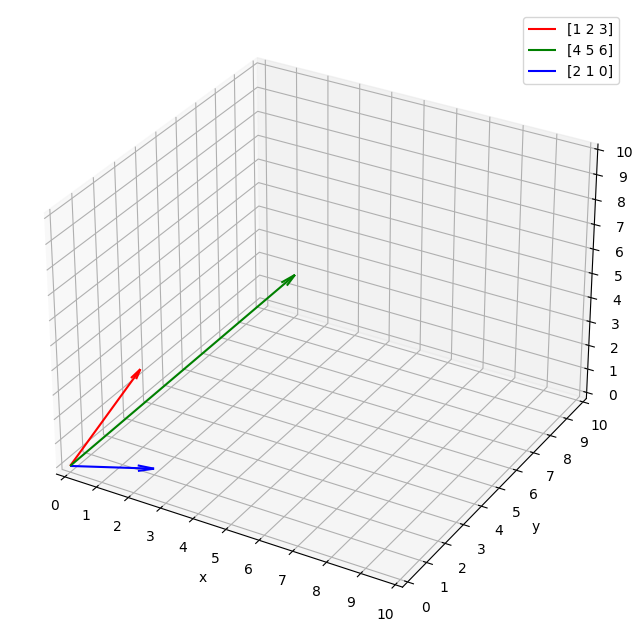

In [40]:
ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')

tail = np.array([0, 0, 0])
ax.quiver(*tail, *v1, color='red', arrow_length_ratio=0.1, label=v1.T[0])
ax.quiver(*tail, *v2, color='green', arrow_length_ratio=.05, label=v2.T[0])
ax.quiver(*tail, *v3, color='blue', arrow_length_ratio=.2, label=v3.T[0])

ax.set_xticks(np.linspace(0, 10, 11))
ax.set_yticks(np.linspace(0, 10, 11))
ax.set_zticks(np.linspace(0, 10, 11))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()

plt.show()

### 2.3.2.6 Columns of a Matrix and Linear Independence

$$
A = \begin{bmatrix}
0 & 1 & 4 \\
1 & 2 & -1 \\
5 & 8 & 0
\end{bmatrix}
$$

The columns of Matrix $A$ are **linearly independent** if and only if $Ax = 0$ has only the trivial solution.

In [41]:
# A is an augmented matrix
A = sym.Matrix([[0, 1, 4, 0],
                [1, 2, -1, 0],
                [5, 8, 0, 0]])
A

Matrix([
[0, 1,  4, 0],
[1, 2, -1, 0],
[5, 8,  0, 0]])

$R_1 \leftrightarrow R_2$

In [42]:
r1 = A.row(0)
r2 = A.row(1)
A[0, :] = r2
A[1, :] = r1
A

Matrix([
[1, 2, -1, 0],
[0, 1,  4, 0],
[5, 8,  0, 0]])

$R_3 \leftarrow R_3 - 5R_1$

In [43]:
A[2, :] = A.row(2) - 5 * A.row(0)
A

Matrix([
[1,  2, -1, 0],
[0,  1,  4, 0],
[0, -2,  5, 0]])

$R_3 \leftarrow R_3 + 2R_2$

In [44]:
A[2, :] = A.row(2) + 2 * A.row(1)
A

Matrix([
[1, 2, -1, 0],
[0, 1,  4, 0],
[0, 0, 13, 0]])

$$
\begin{align}
x_1 + 2x_2 - x_3 &= 0 \tag{1} \\
x_2 + 4x_3 &= 0 \tag{2} \\
13x_3 &= 0 \tag{3}
\end{align}
$$

We can see that $x_3 = 0$

Substituting $x_3$ into equation 2:

$x_2 + 4(0) = 0 \implies x_2 = 0$

Substituting $x_2$ and $x_3$ into equation 2:

$x_2 + 2(0) - 0 = 0 \implies x_1 = 0$

$$
\begin{align}
x_1 &= 0
x_2 &= 0
x_3 &= 0
\end{align}
$$

$Ax = b$ has only the trivial solution

$\therefore$ the columns of Matrix $A$ are linearly indepenent.

In [45]:
# alternately
A = sym.Matrix([[0, 1, 4],
                [1, 2, -1],
                [5, 8, 0]])
A

Matrix([
[0, 1,  4],
[1, 2, -1],
[5, 8,  0]])

In [46]:
A.solve(sym.Matrix([0, 0, 0])) # only the trivial solution

Matrix([
[0],
[0],
[0]])

## Example

Are the vectors $x$, $y$ and $z$ linearly independent?

In [47]:
x = np.array([[1], [2], [3]])
y = np.array([[3], [2], [1]])
z = np.array([[0], [4], [8]])
b = np.array([[0], [0], [0]])

In [48]:
# A is the augmented matrix
A = np.hstack([x, y, z, b])
A

array([[1, 3, 0, 0],
       [2, 2, 4, 0],
       [3, 1, 8, 0]])

In [49]:
A = sym.Matrix(A)
A

Matrix([
[1, 3, 0, 0],
[2, 2, 4, 0],
[3, 1, 8, 0]])

In [50]:
A.rref(pivots=False)

Matrix([
[1, 0,  3, 0],
[0, 1, -1, 0],
[0, 0,  0, 0]])

$$
\begin{align}
x + 3z &= 0 \\
y - z &= 0
\end{align}
$$

In [51]:
# c is a solution
z = sym.symbols('z')
c = sym.Matrix([-3 * z, z, z])
c

Matrix([
[-3*z],
[   z],
[   z]])

There are non-trivial solutions, $\therefore$ these 3 vectors are **linearly dependent**

## 2.3.3 Linear Transformations and Matrix Inverse

### 2.3.3.1 Linear Transformations